In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

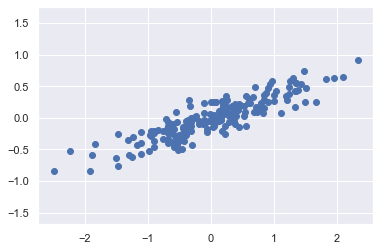

In [20]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)   #find spanning vectors C (2 dimensions, 2 components) will be able to map any point in the map
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print (pca.explained_variance_)

[0.7625315 0.0184779]


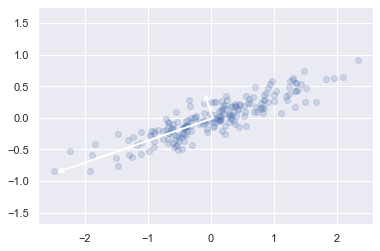

In [15]:
def draw_vector(v0, v1, ax=None):    #defining function to draw the spanning vectors
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [16]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


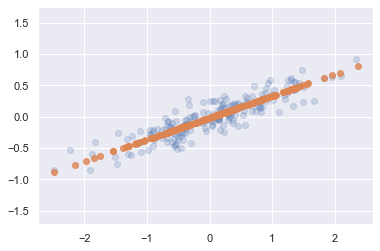

In [19]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [21]:
# PCA for visualization: Hand-written digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [55]:
pca = PCA(10)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 10)


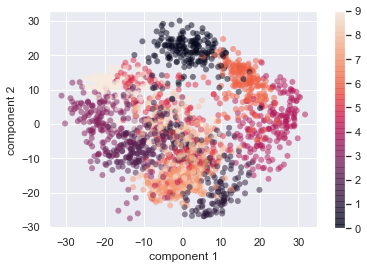

In [56]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)#,
            #cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

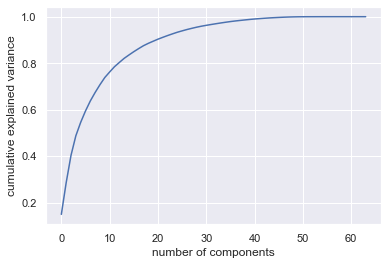

In [57]:
#Choosing number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#looking at the graph, for these example, around 10-20 components should be pretty useful?,
#trading off the other components due to training capacity...


In [58]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [59]:
from sklearn.model_selection import train_test_split
#actually using the PCA reduction from 64 to 10, chose 10 based on variance graph...
Xtrain, Xtest, ytrain, ytest = train_test_split(projected, digits.target,
                                                random_state=0)
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000) #10,10,10 can play with these and iters, 3 layers of 10 nodes each) 
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)


In [60]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.86      0.79      0.82        47
           2       0.89      0.91      0.90        43
           3       0.84      0.88      0.86        43
           4       0.97      0.88      0.93        42
           5       0.88      0.91      0.89        46
           6       0.98      0.96      0.97        53
           7       0.88      0.89      0.88        47
           8       0.71      0.71      0.71        48
           9       0.85      0.89      0.87        45

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



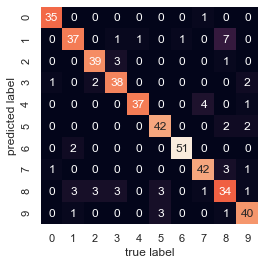

In [61]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');